In [0]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

Here I will explore using an ODE solver to numerically solve differential equations. In this instance, I will be looking at the Lotka-Volterra Predator-Prey model as described below.

$$\begin{align}
&\frac{dx}{dt} =  - x + \beta xy \\
&\frac{dy}{dt} =   y -\delta xy \\
\end{align}$$

Here however we have re-dimensionalised the system to reduce the system from four parameters to two.

Firstly, we note that this system has no closed form solution hence the use of an ODE solver. However, by studying the isoclines, we can see that the system is a conserved quantity.

From

$$ \frac{dy}{dx} = \frac{y+ \delta xy}{\beta xy - x} $$

We find that:

$$ \beta y - \ln y = \ln x +  \delta x + C $$ 

Is a conserved quantity of the system, and shows us that we have solutions which orbit the plane in some way.

In [0]:
t = np.linspace(0, 50, 5000)
beta = 0.3
delta = 0.28
def dX_dt(X, t):
  #input parameter X is a vector (x,y)^T
  return [-X[0] + beta*X[0]*X[1], X[1] - delta*X[0]*X[1]]

In [4]:
X0 = np.array([5, 5])                     
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message'] 

'Integration successful.'

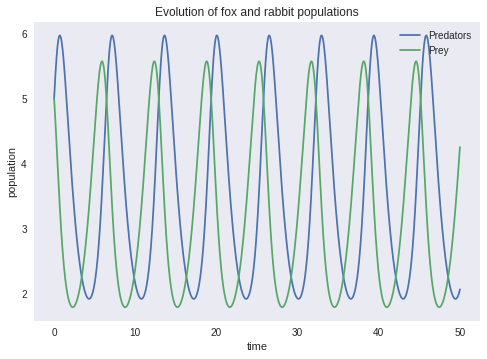

In [5]:
pred, prey = X.T
f1 = plt.figure()
plt.plot(t, pred, label='Predators')
plt.plot(t, prey, label='Prey')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')
plt.show()

Prior to plotting a phase portrait of the system, we can calculate the fixed points of the system by analysing the null clines.

$$\begin{equation}
  \left.\begin{aligned}
  \dot x&=-x + \beta xy \overset{!}{=} 0\\
  \dot y&=y - \delta xy \overset{!}{=} 0\\
\end{aligned}\right\} \implies (0,0) \:  \text{and} \: (\frac{1}{\delta}, \frac{1}{\beta})\:\text{are fixed points.}
\end{equation}$$

We can  also use python and the Hartman-Gro$\beta$mann / Linearisation Theorem to analyse the dynamics of the system near those fixed points.

In [0]:
def jacobian(X):
  #returns the jacbobian of the system at a point X
  return np.array([[-1 + beta*X[1], beta*X[0]     ], 
                  [-delta*X[1]   , 1 - delta*X[0]]])

#define our two fixed points:
fX_1 = np.array([0,0])
fX_2 = np.array([1/delta, 1/beta])

In [10]:
#Looking at the stability of the fixed points by inputting them into the jacobian and calculating the eigenvalues.

stab_fX_1 = jacobian(fX_1)
stab_fX_1

array([[-1.,  0.],
       [-0.,  1.]])

By inspection we see that the eigenvalues at $(0,0)$ are $\lambda = \pm 1$. By the Linearisation Theorem, we know that this point is a saddle.

In [16]:
lambdas_1, v_1 = np.linalg.eig(stab_fX_1)
v_1

array([[1., 0.],
       [0., 1.]])

The fixed point at $(0,0)$ has eigenvectors:  $(1,0)^T, \: (0,1)^T$ for $\lambda = -1$ and $\lambda = 1$ respectively.

In [11]:
stab_fX_2 = jacobian(fX_2)
stab_fX_2

array([[ 0.        ,  1.07142857],
       [-0.93333333,  0.        ]])

In [15]:
lambdas, v = np.linalg.eig(stab_fX_2)
lambdas

array([0.+1.j, 0.-1.j])

Here we find that we have a centre at the fixed point $(\frac{1}{\delta}, \frac{1}{\beta})$ since we have eigenvalues with only imaginary parts.

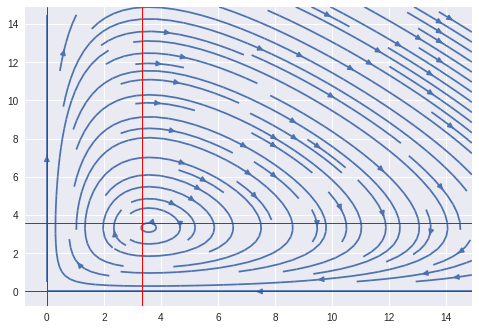

In [41]:
xvalues, yvalues = np.meshgrid(np.arange(0, 15, 0.1), np.arange(0, 15, 0.1))
xdot = -xvalues + beta*xvalues*yvalues
ydot = yvalues - delta*xvalues*yvalues
plt.streamplot(xvalues, yvalues, xdot, ydot)
plt.axvline(x = 1/beta, color = 'r', lw=1, label='x-nullcline')
plt.axhline(y = 1/delta, color = 'r', lw=1, label='y-nullcline')
plt.axvline(x = 0, color = 'r', lw=1, label='x-nullcline')
plt.axhline(y = 0, color = 'r', lw=1, label='y-nullcline')
plt.show()

Here we see that there are oribts in our solutions as we predicted originally by studying the isoclines. These orbits however are unstable, as it we pertubate the solution slightly, it follows a new closed curve. for such solutions, we need to look at situations in which a limit cycle occurs in our system.